In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [2]:
# https://www.kaggle.com/datasets/tawfikelmetwally/automobile-dataset
data = pd.read_csv('Automobile.csv', sep=",")

In [3]:
data.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


In [4]:
data.dtypes

name             object
mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
dtype: object

In [5]:
data.shape

(398, 9)

# Удаление/замена пропусков

In [6]:
data.isnull().sum()

name            0
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [7]:
data_del0_1 = data.dropna(axis = 1 , how = "any")
data.shape,data_del0_1.shape

((398, 9), (398, 8))

In [8]:
data_del0_1.dtypes

name             object
mpg             float64
cylinders         int64
displacement    float64
weight            int64
acceleration    float64
model_year        int64
origin           object
dtype: object

In [9]:
data_del0_2 = data.dropna(axis = 0 , how = "any")
data.shape,data_del0_2.shape

((398, 9), (392, 9))

In [10]:
data_new_3 = data.fillna("Unknown")
data.shape,data_new_3.shape
data_new_3.dtypes

name             object
mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model_year        int64
origin           object
dtype: object

In [11]:
cat_temp_data = data[['horsepower']]
cat_temp_data['horsepower'].unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

In [12]:
cat_temp_data.head()

,horsepower
0,130.0
1,165.0
2,150.0
3,150.0
4,140.0


In [13]:
cat_temp_data[cat_temp_data['horsepower'].isnull()].shape

(6, 1)

In [14]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='constant',fill_value=0)
data_imp = imp.fit_transform(cat_temp_data)
data_imp

array([[130.],
       [165.],
       [150.],
       [150.],
       [140.],
       [198.],
       [220.],
       [215.],
       [225.],
       [190.],
       [170.],
       [160.],
       [150.],
       [225.],
       [ 95.],
       [ 95.],
       [ 97.],
       [ 85.],
       [ 88.],
       [ 46.],
       [ 87.],
       [ 90.],
       [ 95.],
       [113.],
       [ 90.],
       [215.],
       [200.],
       [210.],
       [193.],
       [ 88.],
       [ 90.],
       [ 95.],
       [  0.],
       [100.],
       [105.],
       [100.],
       [ 88.],
       [100.],
       [165.],
       [175.],
       [153.],
       [150.],
       [180.],
       [170.],
       [175.],
       [110.],
       [ 72.],
       [100.],
       [ 88.],
       [ 86.],
       [ 90.],
       [ 70.],
       [ 76.],
       [ 65.],
       [ 69.],
       [ 60.],
       [ 70.],
       [ 95.],
       [ 80.],
       [ 54.],
       [ 90.],
       [ 86.],
       [165.],
       [175.],
       [150.],
       [153.],
       [15

In [15]:
data_imp[data_imp==0].size

6

# Кодирование

In [16]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
cat_enc = pd.DataFrame({'c1':data['origin']})
cat_enc

,c1
0,usa
1,usa
2,usa
3,usa
4,usa
...,...
393,usa
394,europe
395,usa
396,usa


In [17]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])
cat_enc['c1'].unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [18]:
np.unique(cat_enc_le)

array([0, 1, 2])

In [19]:
le.inverse_transform([0, 1, 2])

array(['europe', 'japan', 'usa'], dtype=object)

In [20]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])
cat_enc.shape

(398, 1)

In [21]:
cat_enc_ohe

<398x3 sparse matrix of type '<class 'numpy.float64'>'
	with 398 stored elements in Compressed Sparse Row format>

In [22]:
cat_enc_ohe.todense()

matrix([[0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        ...,
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.]])

In [23]:
pd.get_dummies(cat_enc, dummy_na=True).head()

,c1_europe,c1_japan,c1_usa,c1_nan
0,False,False,True,False
1,False,False,True,False
2,False,False,True,False
3,False,False,True,False
4,False,False,True,False


# Масштабирование

In [24]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

data = pd.read_csv("./Automobile.csv",sep = ",")
data.dtypes

name             object
mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
dtype: object

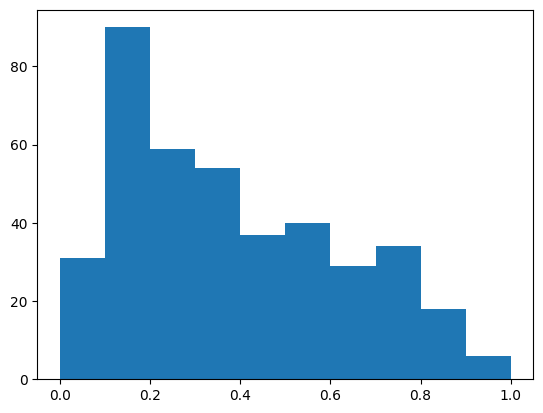

In [25]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['weight']])
plt.hist(sc1_data)
plt.show()

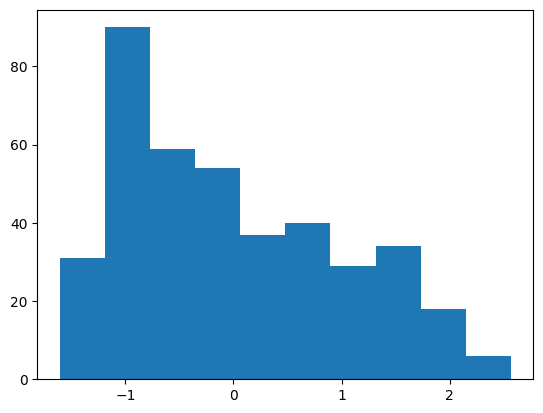

In [26]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['weight']])
plt.hist(sc2_data)
plt.show()

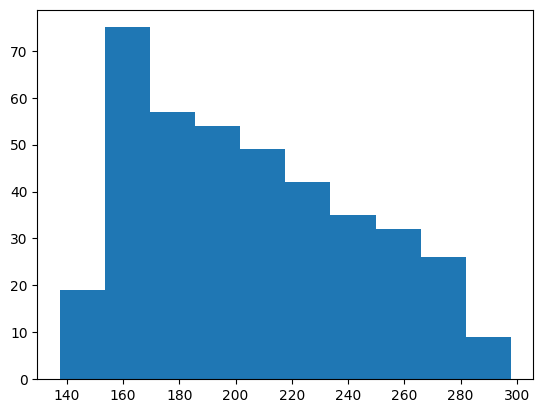

In [27]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, Normalizer
input = data[['weight']]
sc3_data = data['weight']**(1/1.5)
plt.hist(sc3_data)
plt.show()

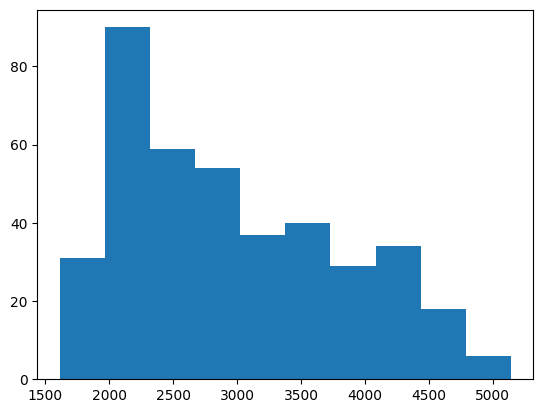

In [28]:
plt.hist(data[['weight']])
plt.show()

# Обработка выбросов

In [29]:
data = pd.read_csv("./cancer.csv",sep = ",")
data.dtypes

Id                             int64
Diagnosis                     object
Radius (mean)                float64
Texture (mean)               float64
Perimeter (mean)             float64
Area (mean)                  float64
Smoothness (mean)            float64
Compactness (mean)           float64
Concavity (mean)             float64
Concave points (mean)        float64
Symmetry (mean)              float64
Fractal dimension (mean)     float64
Radius (se)                  float64
Texture (se)                 float64
Perimeter (se)               float64
Area (se)                    float64
Smoothness (se)              float64
Compactness (se)             float64
Concavity (se)               float64
Concave points (se)          float64
Symmetry (se)                float64
Fractal dimension (se)       float64
Radius (worst)               float64
Texture (worst)              float64
Perimeter (worst)            float64
Area (worst)                 float64
Smoothness (worst)           float64
C

,Concavity (mean)
count,569.000000
mean,0.088799
std,0.079720
min,0.000000
25%,0.029560
50%,0.061540
75%,0.130700
max,0.426800


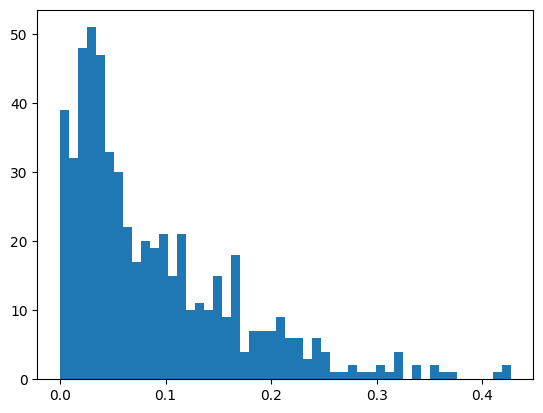

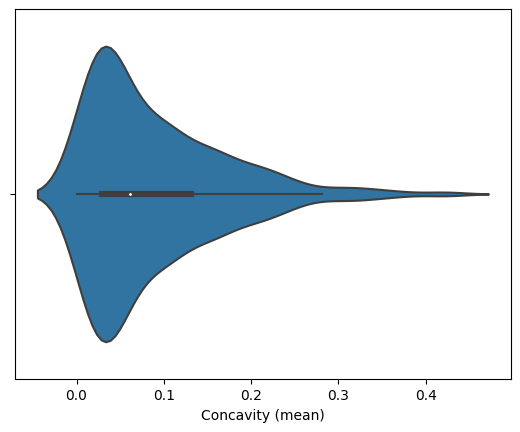

In [30]:
display(data[["Concavity (mean)"]].describe())

plt.hist(data[["Concavity (mean)"]], 50)
plt.show()

sns.violinplot(x=data["Concavity (mean)"]);

(0.0049826, 0.24302000000000004)

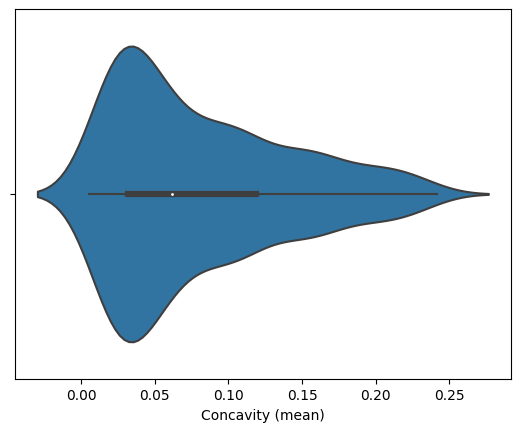

In [31]:
from enum import Enum
class OutlierBoundaryType(Enum):
  SIGMA = 1
  QUANTILE = 2
  IRQ = 3

# Функция вычисления верхней и нижней границы выбросов
def get_outlier_boundaries(df, col, outlier_boundary_type: OutlierBoundaryType):
  if outlier_boundary_type == OutlierBoundaryType.SIGMA:
    K1 = 3
    lower_boundary = df[col].mean() - (K1 * df[col].std())
    upper_boundary = df[col].mean() + (K1 * df[col].std())
  elif outlier_boundary_type == OutlierBoundaryType.QUANTILE:
    lower_boundary = df[col].quantile(0.05)
    upper_boundary = df[col].quantile(0.95)
  elif outlier_boundary_type == OutlierBoundaryType.IRQ:
    K2 = 1.5
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    lower_boundary = df[col].quantile(0.25) - (K2 * IQR)
    upper_boundary = df[col].quantile(0.75) + (K2 * IQR)
  else:
    raise NameError('Unknown Outlier Boundary Type')

  return lower_boundary, upper_boundary

lower_boundary, upper_boundary = get_outlier_boundaries(data, "Concavity (mean)", OutlierBoundaryType.QUANTILE)
outliers_temp = np.where(
  data["Concavity (mean)"] > upper_boundary,
  True,
  np.where(
    data["Concavity (mean)"] < lower_boundary,
    True,
    False
  )
)
data_trimmed = data.loc[~(outliers_temp),]
sns.violinplot(x=data_trimmed["Concavity (mean)"])
lower_boundary, upper_boundary

,Radius (mean)
count,569.000000
mean,14.127292
std,3.524049
min,6.981000
25%,11.700000
50%,13.370000
75%,15.780000
max,28.110000


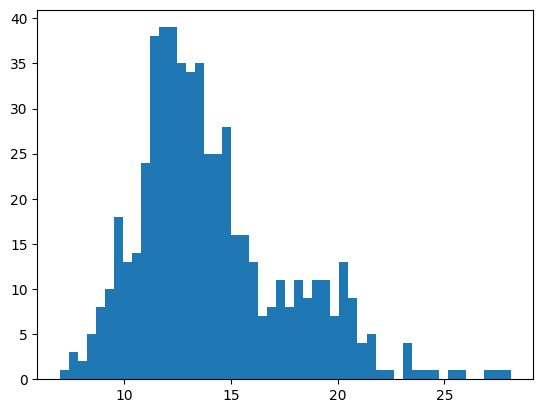

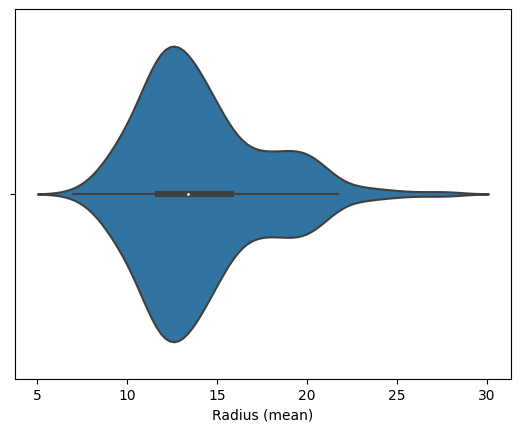

In [32]:
display(data[["Radius (mean)"]].describe())

plt.hist(data[["Radius (mean)"]], 50)
plt.show()

sns.violinplot(x=data["Radius (mean)"]);

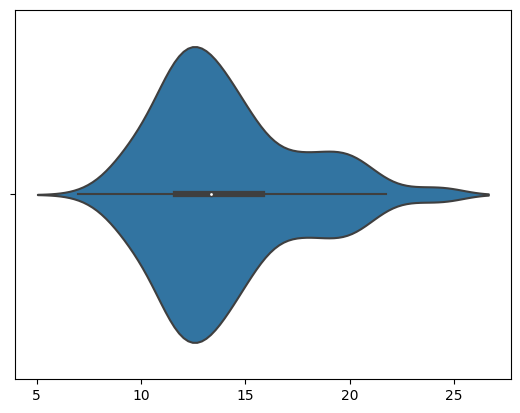

In [33]:
lower_boundary, upper_boundary = get_outlier_boundaries(data, "Radius (mean)", OutlierBoundaryType.SIGMA)
data_replaced = np.where(
  data['Radius (mean)'] > upper_boundary,
  upper_boundary,
  np.where(
    data['Radius (mean)'] < lower_boundary,
    lower_boundary,
    data['Radius (mean)'],
  )
)

sns.violinplot(x=data_replaced);

# Обработка нестандартного признака

In [34]:
data = pd.read_csv('cancer.csv', sep=",")
data["Diagnosis_my"] = data.apply(lambda x: 1 if x['Diagnosis'] == 'B' else 0, axis=1)
data = data.drop({'Id', 'Diagnosis'}, axis=1)
data.head()

,Radius (mean),Texture (mean),Perimeter (mean),Area (mean),Smoothness (mean),Compactness (mean),Concavity (mean),Concave points (mean),Symmetry (mean),Fractal dimension (mean),...,Texture (worst),Perimeter (worst),Area (worst),Smoothness (worst),Compactness (worst),Concavity (worst),Concave points (worst),Symmetry (worst),Fractal dimension (worst),Diagnosis_my
0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,1
1,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,1
2,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,1
3,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,1
4,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,1


# Отбор признаков

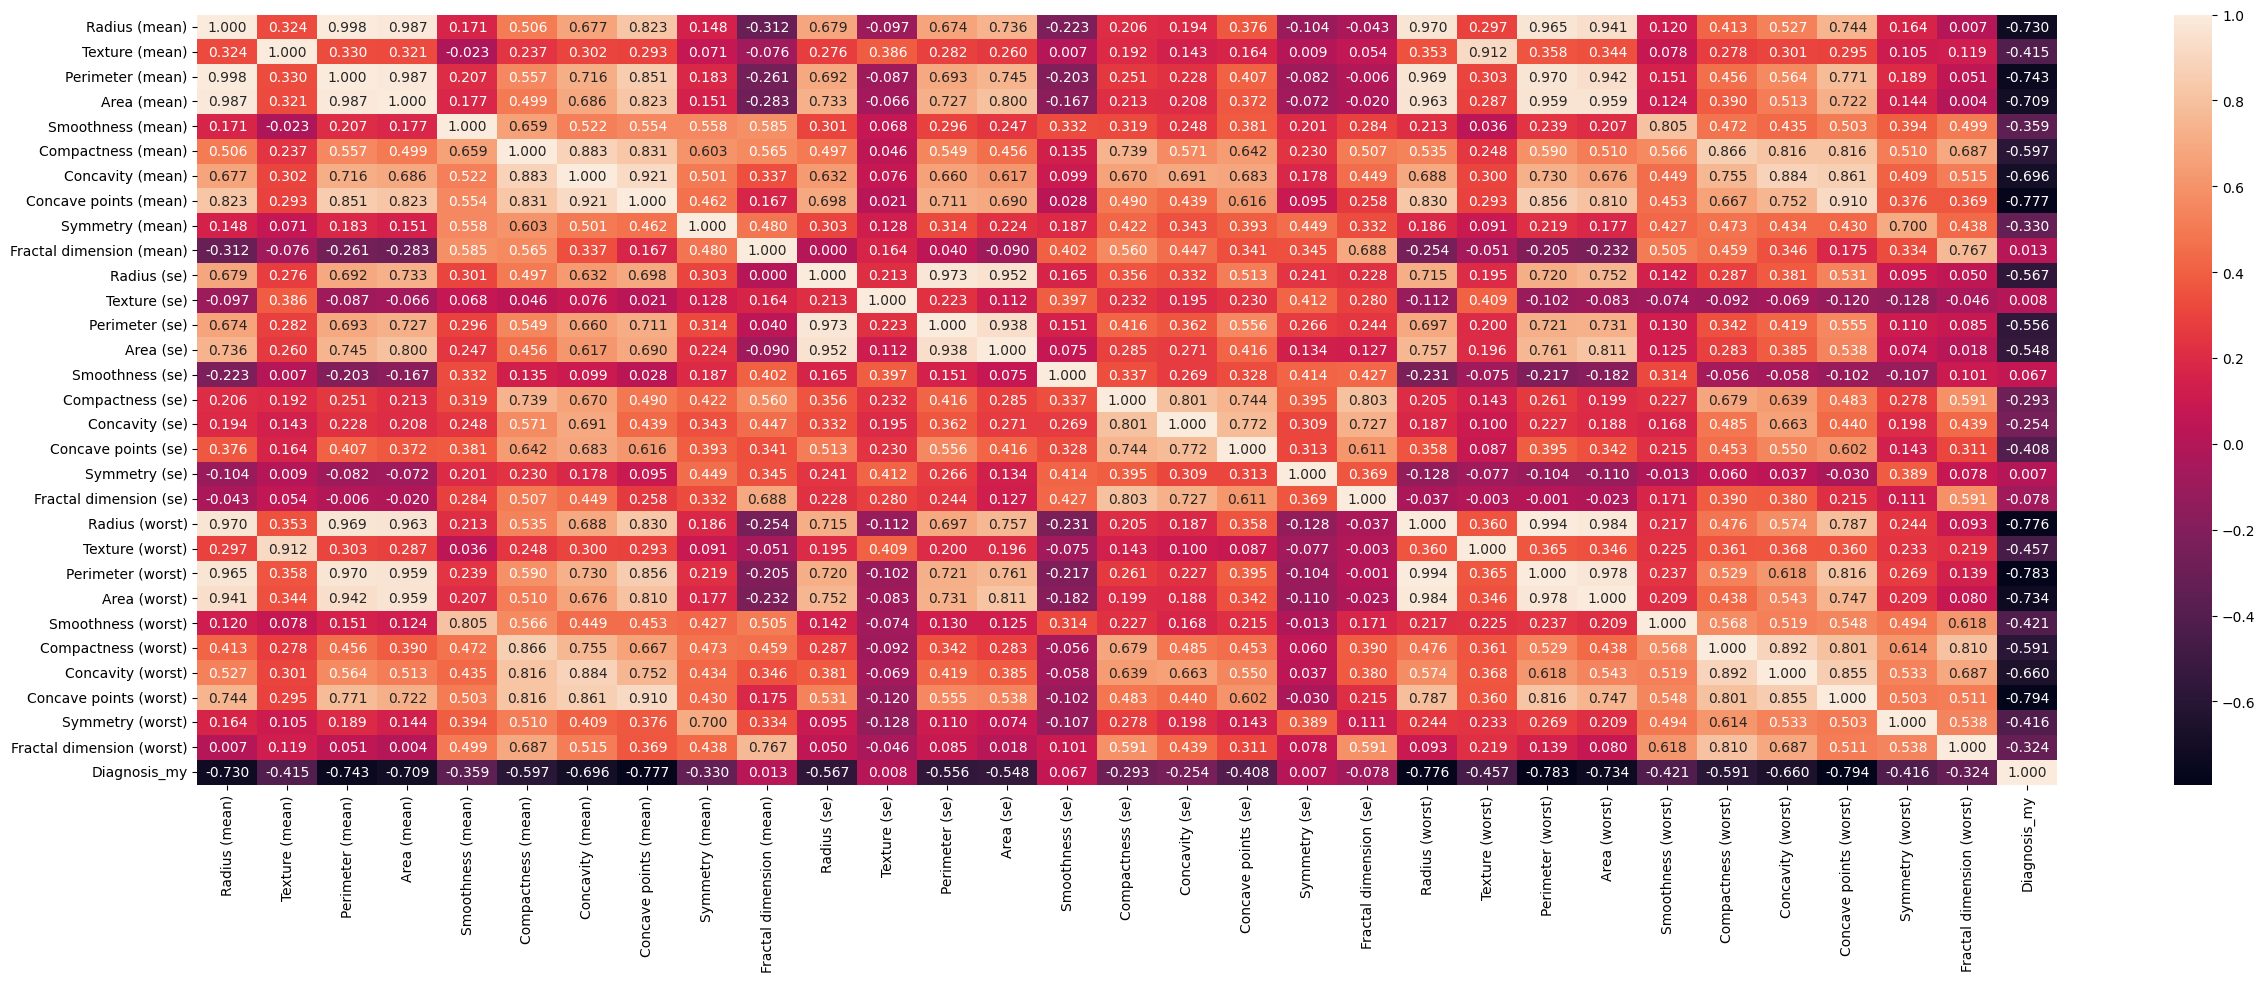

In [35]:
plt.figure(figsize = (30, 10))
sns.heatmap(data.corr(), annot=True, fmt='.3f');

In [36]:
# Формирование DataFrame с сильными корреляциями
# Желательно, чтобы признаки хорошо коррелировали с целевым признаком.
# Важно, чтобы признаки не коррелировали между собой.

def make_corr_df(df):
  cr = data.corr()
  cr = cr.abs().unstack()
  cr = cr.sort_values(ascending=False)
  cr = cr[abs(cr) >= 0.5]
  cr = cr[cr < 1]
  cr = pd.DataFrame(cr).reset_index()
  cr.columns = ['f1', 'f2', 'corr']
  return cr

In [37]:
make_corr_df(data).query("f2 == 'Diagnosis_my'")

,f1,f2,corr
88,Concave points (worst),Diagnosis_my,0.793566
92,Perimeter (worst),Diagnosis_my,0.782914
95,Concave points (mean),Diagnosis_my,0.776614
96,Radius (worst),Diagnosis_my,0.776454
122,Perimeter (mean),Diagnosis_my,0.742636
128,Area (worst),Diagnosis_my,0.733825
135,Radius (mean),Diagnosis_my,0.730029
155,Area (mean),Diagnosis_my,0.708984
162,Concavity (mean),Diagnosis_my,0.696360
203,Concavity (worst),Diagnosis_my,0.659610


In [38]:
data.isnull().sum()

Radius (mean)                0
Texture (mean)               0
Perimeter (mean)             0
Area (mean)                  0
Smoothness (mean)            0
Compactness (mean)           0
Concavity (mean)             0
Concave points (mean)        0
Symmetry (mean)              0
Fractal dimension (mean)     0
Radius (se)                  0
Texture (se)                 0
Perimeter (se)               0
Area (se)                    0
Smoothness (se)              0
Compactness (se)             0
Concavity (se)               0
Concave points (se)          0
Symmetry (se)                0
Fractal dimension (se)       0
Radius (worst)               0
Texture (worst)              0
Perimeter (worst)            0
Area (worst)                 0
Smoothness (worst)           0
Compactness (worst)          0
Concavity (worst)            0
Concave points (worst)       0
Symmetry (worst)             0
Fractal dimension (worst)    0
Diagnosis_my                 0
dtype: int64

In [39]:
#Метод из группы методов обертывания
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

x = data[['Concave points (worst)', 'Perimeter (worst)', 'Concave points (mean)', 'Radius (worst)', 'Perimeter (mean)', 'Area (worst)', 'Radius (mean)', 'Area (mean)', 'Concavity (mean)', 'Compactness (mean)']]

y = data['Diagnosis_my']
x.dtypes

Concave points (worst)    float64
Perimeter (worst)         float64
Concave points (mean)     float64
Radius (worst)            float64
Perimeter (mean)          float64
Area (worst)              float64
Radius (mean)             float64
Area (mean)               float64
Concavity (mean)          float64
Compactness (mean)        float64
dtype: object

In [40]:
y.dtypes

dtype('int64')

In [41]:
knn = KNeighborsClassifier(n_neighbors=3)
efs1 = EFS(knn, 
           min_features=2,
           max_features=4,
           scoring='accuracy',
           print_progress=True,
           cv=5)

efs1 = efs1.fit(x, y)

print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)

Features: 375/375

Best accuracy score: 0.94
Best subset (indices): (0, 1, 6)
Best subset (corresponding names): ('Concave points (worst)', 'Perimeter (worst)', 'Radius (mean)')


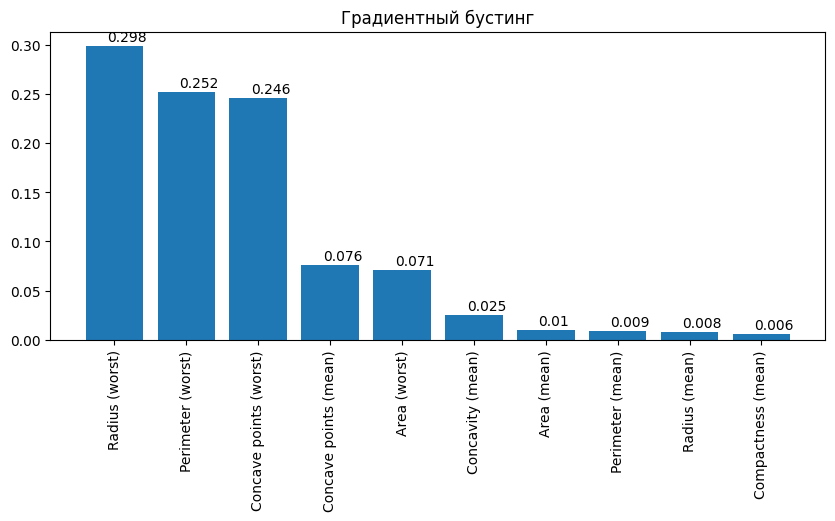

In [42]:
#Метод из группы методов вложений
from operator import itemgetter
from sklearn.ensemble import GradientBoostingRegressor

def draw_feature_importances(tree_model, X_dataset, title, figsize=(7,4)):
  # Сортировка значений важности признаков по убыванию
  list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
  sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
  # Названия признаков
  labels = [x for x,_ in sorted_list]
  # Важности признаков
  data = [x for _,x in sorted_list]
  # Вывод графика
  fig, ax = plt.subplots(figsize=figsize)
  ax.set_title(title)
  ind = np.arange(len(labels))
  plt.bar(ind, data)
  plt.xticks(ind, labels, rotation='vertical')
  # Вывод значений
  for a,b in zip(ind, data):
    plt.text(a-0.1, b+0.005, str(round(b,3)))
  plt.show()
  return labels, data

# Градиентный бустинг
gbr1 = GradientBoostingRegressor()
gbr1.fit(x, y);

draw_feature_importances(gbr1, x, 'Градиентный бустинг', figsize=(10,4));